In [1]:
## estudio preliminar de correlación
import pandas as pd
import numpy as np
#alternativa de carga
fichero = 'Dataset_Valorame_curadoSinConteoHojas_Python.csv'
    

raw_dataset = pd.read_csv(fichero,  sep=';')

dataset = raw_dataset.copy()
dataset.tail()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 69 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   SDESAM                                                                                                                 21013 non-null  object 
 1   G_IND2_Incapacidad parental de control de conducta                                                                     21013 non-null  int64  
 2   G_IND2_Graves dificultades personales en el padre, la madre o personas que ejercen la tutela o guarda                  21013 non-null  int64  
 3   G_IND2_Necesidades Físicas - Vestido                                                                                   21013 non-null  int64  
 4 

In [16]:
variables_categoricas = ['ANACPE',
                         'CTPSEX',
                         'CPAISE',
                         'DDISCA',
                         'CPROVI',
                         'CINELO',
                         'CODPOS',
                         'SVAGLO',
                         'STRATA',
                         'SINTER',
                         'SESTAD',
                         'DAMBIT',
                         'DTPPRO',
                         'CPROCE',
                         'CINELC',
                         'SNUEVA',
                         'SCONSU']
data_categorical = dataset[variables_categoricas]
data_categorical.head()

,ANACPE,CTPSEX,CPAISE,DDISCA,CPROVI,CINELO,CODPOS,SVAGLO,STRATA,SINTER,SESTAD,DAMBIT,DTPPRO,CPROCE,CINELC,SNUEVA,SCONSU
0,2007,2,724,N,29,29067000502,29007.0,R,N,N,N,EELL,Trabajador/a Social,29,29067000502,S,N
1,2003,1,724,N,4,4048000401,4280.0,G,N,N,D,SPM,Trabajador/a Social,4,4048000401,N,S
2,2003,2,724,N,4,4049000101,4630.0,N,N,N,D,SPM,Trabajador/a Social,4,4049000101,N,S
3,2009,1,724,N,4,4052000404,4230.0,G,N,S,D,SPM,Psicólogo/a,4,4024000101,N,S
4,2018,1,724,N,29,29067000502,29010.0,G,N,N,D,SPM,Trabajador/a Social,29,29067000502,N,S


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['SDESAM'] = le.fit_transform(dataset['SDESAM'])

In [3]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd


transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['ANACPE',
                         'CTPSEX',
                         'CPAISE',
                         'DDISCA',
                         'CPROVI',
                         'CINELO',
                         'CODPOS',
                         'SVAGLO',
                         'STRATA',
                         'SINTER',
                         'SESTAD',
                         'DAMBIT',
                         'DTPPRO',
                         'CPROCE',
                         'CINELC',
                         'SNUEVA',
                         'SCONSU']),
    remainder='passthrough',
verbose_feature_names_out=False)

transformed = transformer.fit_transform(dataset)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
print(transformed_df.head())

   ANACPE_1983  ANACPE_1997  ANACPE_1998  ANACPE_2000  ANACPE_2001  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   ANACPE_2002  ANACPE_2003  ANACPE_2004  ANACPE_2005  ANACPE_2006  ...  \
0          0.0          0.0          0.0          0.0          0.0  ...   
1          0.0          1.0          0.0          0.0          0.0  ...   
2          0.0          1.0          0.0          0.0          0.0  ...   
3          0.0          0.0          0.0          0.0          0.0  ...   
4          0.0          0.0          0.0          0.0          0.0  ...   

   G_IND2_Necesidades Físicas - Estabilidad y condiciones habitabilidad  \
0                                                0.0 

In [5]:
transformed_df



,ANACPE_1983,ANACPE_1997,ANACPE_1998,ANACPE_2000,ANACPE_2001,ANACPE_2002,ANACPE_2003,ANACPE_2004,ANACPE_2005,ANACPE_2006,...,G_IND2_Necesidades Físicas - Estabilidad y condiciones habitabilidad,G_IND_D.Abandono,G_IND2_Necesidades Físicas - Cuidado de salud física,G_IND2_Corrupción,G_IND2_Necesidades Físicas - Higiene personal,G_IND2_Necesidades psíquicas - Atención a problemas emocionales graves,PR_Hermano/a,"G_IND2_Necesidades psíquicas - Normas, límites y transmisión de valores",G_IND2_Violencia sexual,G_IND2_Necesidades psíquicas - Estimulación
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1686


(1686, 1686)

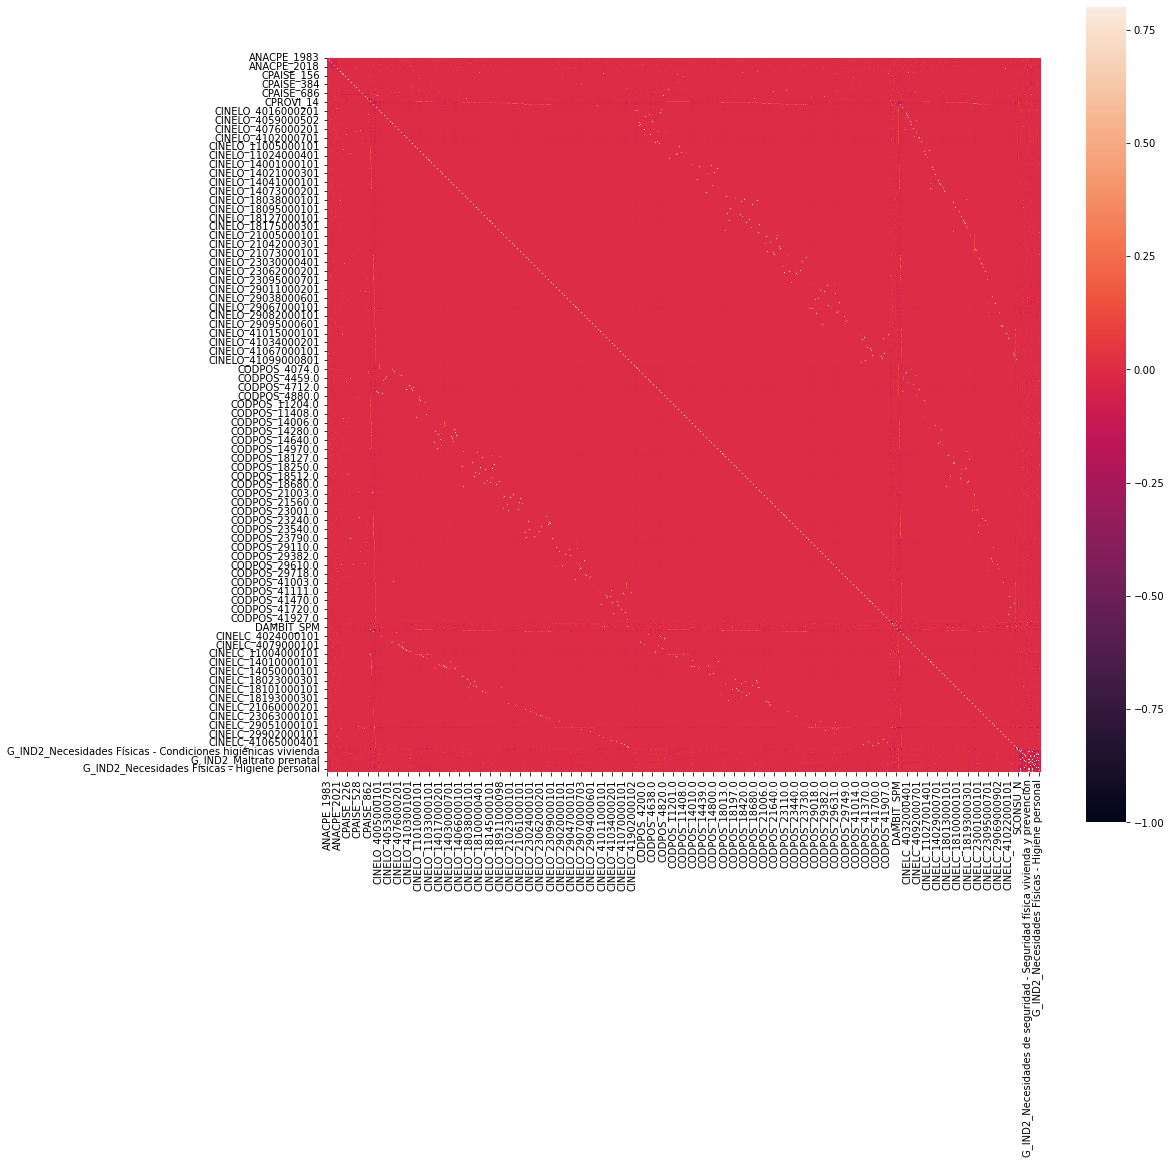

In [4]:
# Matriz de correlación:
import matplotlib.pyplot as plt
import seaborn as sns
import math
print(len(transformed_df.columns))
corrmat = transformed_df.corr()
f, ax = plt.subplots(figsize=(16, 15))
sns.heatmap(corrmat, vmax=.8, square=True);
corrmat.shape

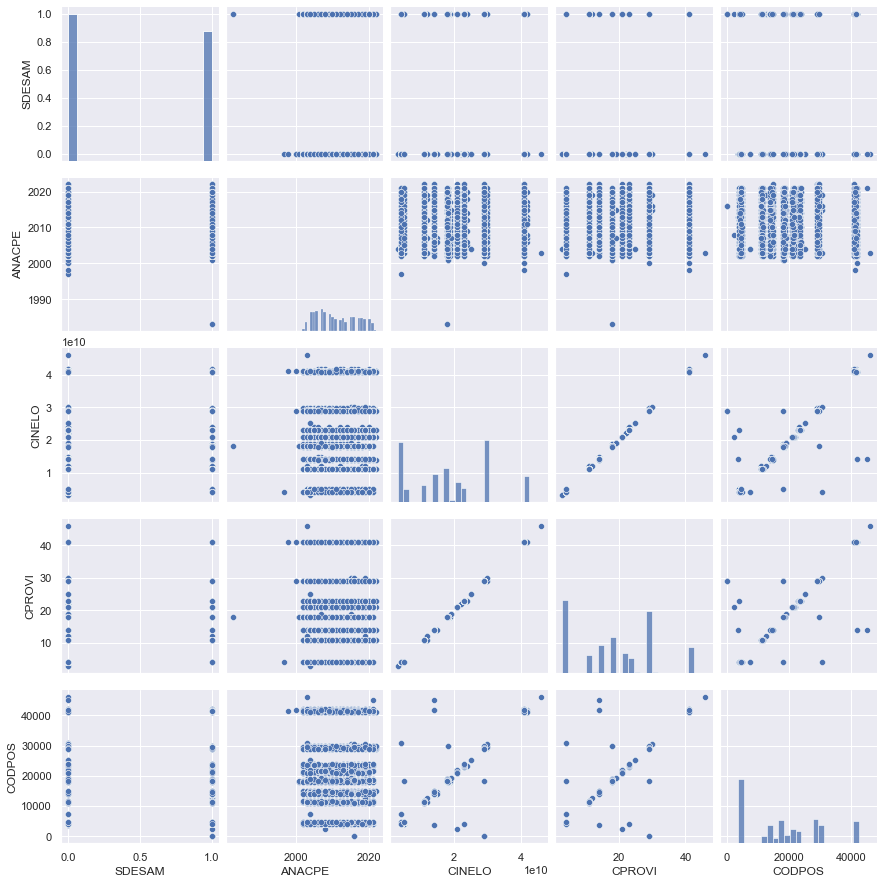

In [8]:
sns.set()
cols = ['SDESAM', 'ANACPE', 'CINELO', 'CPROVI', 'CODPOS']
sns.pairplot(dataset[cols], height = 2.5)
plt.show();

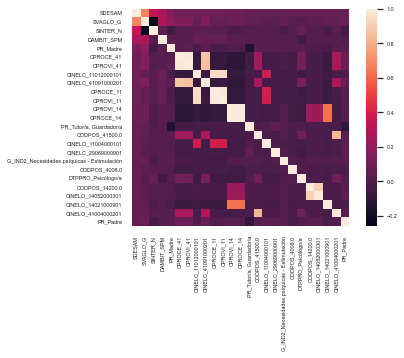

In [13]:
# Matriz de correlación
k = 25 # Número de variables.
cols = corrmat.nlargest(k, 'SDESAM')['SDESAM'].index
cm = np.corrcoef(transformed_df[cols].values.T)
sns.set(font_scale = 0.5)
hm = sns.heatmap(cm, cbar = True, annot = False, square = True, fmt = '.2f', yticklabels = cols.values, xticklabels = cols.values)
plt.show()